## Basic image Operations

In [2]:
import cv2
#cv2.__version__
import matplotlib.pyplot as plt
import os 
import numpy as np

cwd = os.getcwd()
# specify a 0 as a second argument for importing it in grey scale
# default set to 1

In [3]:
def loadDog():
    return cv2.imread(cwd + "/imgs/dog.jpg") 

In [4]:
img = loadDog()
px = img[100, 150, :] # 0 - B, 1 - G, 2 - R
print(px)
print(img.shape)
print(img.dtype)
print(img.size)

[147 212 227]
(259, 194, 3)
uint8
150738


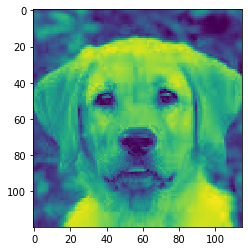

In [5]:
plt.imshow(img[:120, 25:140, 0]) # blue channel

<Figure size 432x288 with 0 Axes>

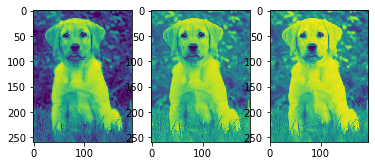

In [6]:
img = loadDog()
b, g, r = cv2.split(img)
# cv.merge((b,g,r))

plt.figure()
f, axarr = plt.subplots(1,3) 
axarr[0].imshow(b)
axarr[1].imshow(g)
axarr[2].imshow(r)

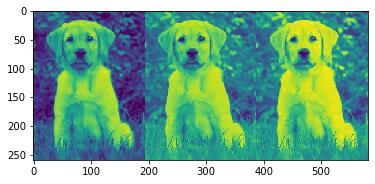

In [7]:
# OR
img = loadDog()
b, g, r = cv2.split(img)
plt.imshow(np.hstack((b,g,r)))

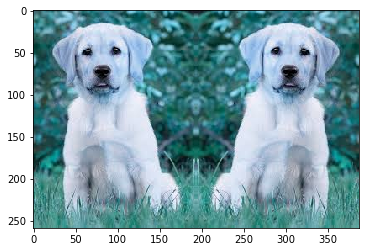

In [8]:
#reflect = cv2.copyMakeBorder(img, 200,200,200,200, cv2.BORDER_REFLECT_101)
plt.imshow(np.hstack((img, img[:,::-1,:])))

### Change Brightness

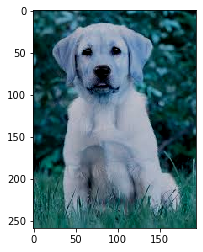

In [11]:
img = loadDog()
brigther = cv2.add(img, -np.array([50.0]))
# add with minus for making it darker
plt.imshow(brigther)
#plt.imshow(img + np.array([50]))

### Blur

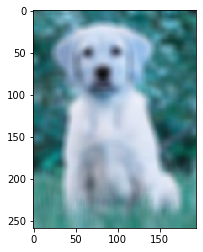

In [13]:
blurImage = cv2.blur(img, (10,10))
plt.imshow(blurImage)

### Sharpen using Convolution

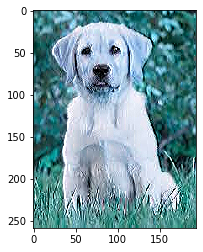

In [50]:
#kernel = np.array([[0.5,-0.5,0.5], [0.5,-0.5,0.5], [0.5,-0.5,0.5]],np.float32)
#kernel = np.array([[-2,2,1], [0,0,-1], [-0.2,0.5,0]],np.float32)
#kernel = np.array([[0.5,0,0.5], [0.5,0,0.5], [0.5,0,0.5]],np.float32)
kernel = np.array([[0,0,0], [0,0,0], [-2,3,0]],np.float32)

sharpImage = cv2.filter2D(img, -1, kernel)
plt.imshow(sharpImage)

### Pyramids

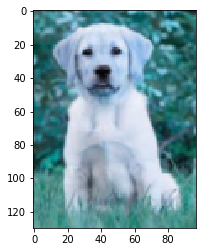

In [52]:
lowerRes = cv2.pyrDown(img)
plt.imshow(lowerRes)

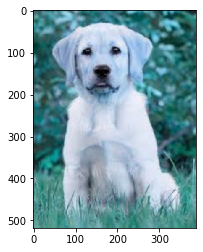

In [54]:
higherRes = cv2.pyrUp(img)
plt.imshow(higherRes)

### Blending

In [64]:
forest = cv2.imread(cwd + "/imgs/forest.jpg") 
forestResized = cv2.resize(forest, (img.shape[1], img.shape[0]))
print(forest.shape)
print(forestResized.shape)
print(img.shape)

(400, 600, 3)
(259, 194, 3)
(259, 194, 3)


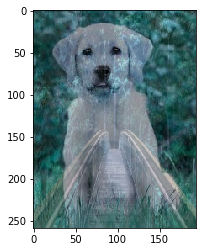

In [67]:
blendedImage = cv2.addWeighted(img, 0.6, forestResized, 0.4, 0)
# Last element is adding something to the resulting image if expressed
plt.imshow(blendedImage)

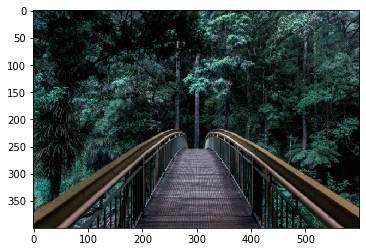

In [66]:
plt.imshow(forest)

### Bitwise Operations